<h1>Prepoznavnje oblika- domaći 1</h1>
<h2>Klasifikcija recepata</h2>

In [71]:
#Ucitavanje biblioteka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV

# <h3>Učitavanje podataka</h3>

In [81]:
#Učitavanje baze u DataFrame
df=pd.read_csv('recipes.csv')

#Ispis prvih 5 vrsta
df.head()

,Unnamed: 0,salt,oil,garlic,pepper,sugar,butter,sauce,olive oil,onions,...,zucchini,mirin,tomato paste,chicken breasts,peanut oil,yellow onion,fillets,lettuce,mayonaise,country
0,450,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,southern_us
1,11584,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,french
2,4645,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,southern_us
3,11074,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,french
4,4783,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,greek


In [82]:
#Izbacivanje prve kolone koja se ne odnosi na satojke
df=df.iloc[:,1::]

In [4]:
#Ispis broja uzoraka i broja obilježja
print("Broj uzoraka:",df.shape[0],"\n")
print("Broj obilježja:",df.shape[1],"\n")

Broj uzoraka: 10566 

Broj obilježja: 151 



-DataFrame ima ukupo 10566 uzoraka koji predstavljaju recepte i 150 obilježja koja se odnose na prisustvo određenog sastojka u datom receptu<br>
-Posljednje obilježje označava klasifikaciono obilježje tj. kategoriju kojoj dati recept pripada, a kategorije su zemlje iz kojih dolazi taj recept<br>

In [22]:
#Provjera da li ima nedostajucih podataka 
null=df.isnull().sum().sort_values(ascending=False)
print("Nedostajući podaci po svakom obilježju:\n",null,"\n")
print("Ukupan broj nedostajućih podataka: ",null.sum())

Nedostajući podaci po svakom obilježju:
 salt            0
wine vinegar    0
white sugar     0
egg whites      0
fish sauce      0
               ..
white wine      0
thyme           0
beans           0
cumin           0
country         0
Length: 151, dtype: int64 

Ukupan broj nedostajućih podataka:  0


-Da bi se vršila predikcija kojoj zemlji koji recept pripada dataFrame se dijeli na ulazni i izlazni skup

In [83]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [36]:
X = df.iloc[:, 2:-1]
y = df.iloc[:, -1]

In [24]:
#Prikaz mogućih izlaza tj kategorija:
print('Oznake zemalja: ', y.unique())


Oznake zemalja:  ['southern_us' 'french' 'greek' 'mexican' 'italian' 'japanese' 'chinese'
 'thai' 'british']


In [25]:
#Prikaz broja uzoraka po zemljama da bi se provjerila balansiranost
print('Broj recepata sa juga SAD : ', sum(y=='southern_us'))
print('Broj recepata iz Francuske: ', sum(y=='french'))
print('Broj recepata iz Grčke: ', sum(y=='greek'))
print('Broj recepata iz Meksika: ', sum(y=='mexican'))
print('Broj recepata iz Italije: ', sum(y=='italian'))
print('Broj recepata iz Japana: ', sum(y=='japanese'))
print('Broj recepata iz Kine: ', sum(y=='chinese'))
print('Broj recepata sa Tajlanda: ', sum(y=='thai'))
print('Broj recepata iz Britanije: ', sum(y=='british'))

Broj recepata sa juga SAD :  2303
Broj recepata iz Francuske:  1565
Broj recepata iz Grčke:  587
Broj recepata iz Meksika:  1274
Broj recepata iz Italije:  1670
Broj recepata iz Japana:  755
Broj recepata iz Kine:  1291
Broj recepata sa Tajlanda:  612
Broj recepata iz Britanije:  509


-Iz prikazanih podataka se vidi postoji izražena nebalansiranost između broja uzoraka po kategorijama, gdje najviše recepata dolazi is SAD, a najmanje iz Britanije čiji je broj čak oko 4 puta manji

In [26]:
#Sumiranje sastojaka po svim uzorcima kako bi se dobio broj recepata u kojima je koji sastojak upotrebljen
ingredient_sum = X.sum(axis = 0).sort_values(ascending=False).reset_index()

Text(0.5, 1.0, 'Top 10 most used ingredients')

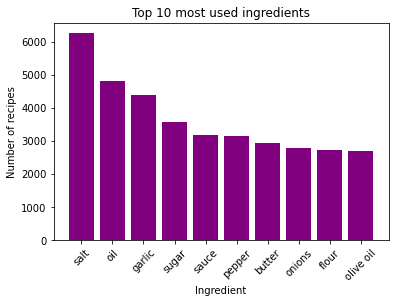

In [27]:
#Prikaz 10 sastojaka koji se najviše koriste
plt.bar(ingredient_sum[0:10]['index'],ingredient_sum[0:10][0],color="purple", linestyle="solid")
plt.tick_params(axis='x', rotation=45)
plt.xlabel('Ingredient')
plt.ylabel('Number of recipes')
plt.title('Top 10 most used ingredients')

<h5>Analiza zastupljenosti sastojaka po zemljama </h5>

In [35]:
#Razdavajanje baze po zemljama
sad=X.loc[df['country']=='southern_us']
french=X.loc[df['country']=='french']
greek=X.loc[df['country']=='greek']
mexican=X.loc[df['country']=='mexican']
italian=X.loc[df['country']=='italian']
japanese=X.loc[df['country']=='japanese']
chinese=X.loc[df['country']=='chinese']
thai=X.loc[df['country']=='thai']
british=X.loc[df['country']=='british']
countries=['sad','french','greek','mexican','italian','japanese','chinese','thai','british'];

-Pošto je broj sastojaka 150,za svaku zemlju će se posmatrati zastupljenost onih sastojaka koji se pojavljuju u više od 15% recepata

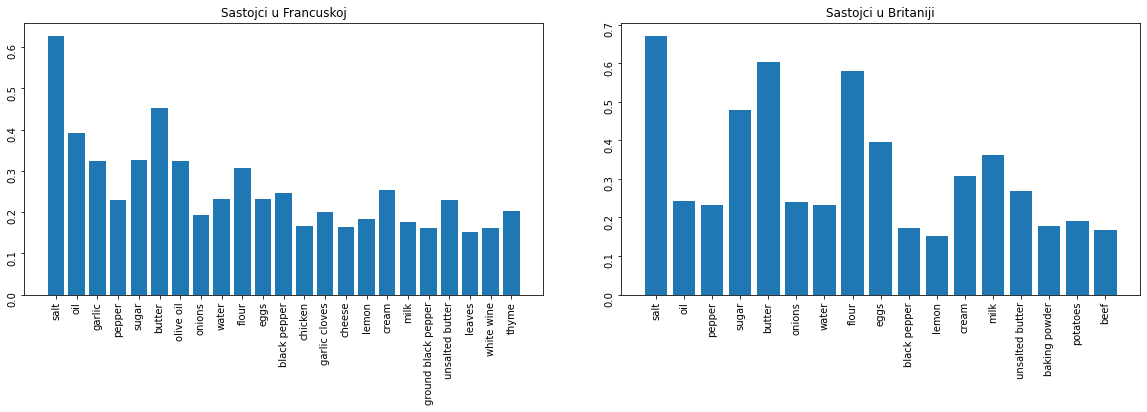

In [36]:
fig, ax = plt.subplots(1, 2, figsize=[20,5])
fig.subplots_adjust(hspace=0.2, wspace=0.15)

values = french.sum(axis=0)/french.shape[0]
toDrop=[]
k = 0
for i in values:
    if i < 0.15:
        toDrop.append(k)
    k = k + 1
french1 = french.drop(french.columns[toDrop], axis=1)
values = values.drop(values.index[toDrop])

values1 = british.sum(axis=0)/british.shape[0]
toDrop=[]
k = 0
for i in values1:
    if i < 0.15:
        toDrop.append(k)
    k = k + 1
british1 = british.drop(british.columns[toDrop], axis=1)
values1 = values1.drop(values1.index[toDrop])

ax[0].bar(french1.columns,values)
ax[1].bar(british1.columns,values1)
ax[0].set_title("Sastojci u Francuskoj")
ax[1].set_title("Sastojci u Britaniji")
ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)


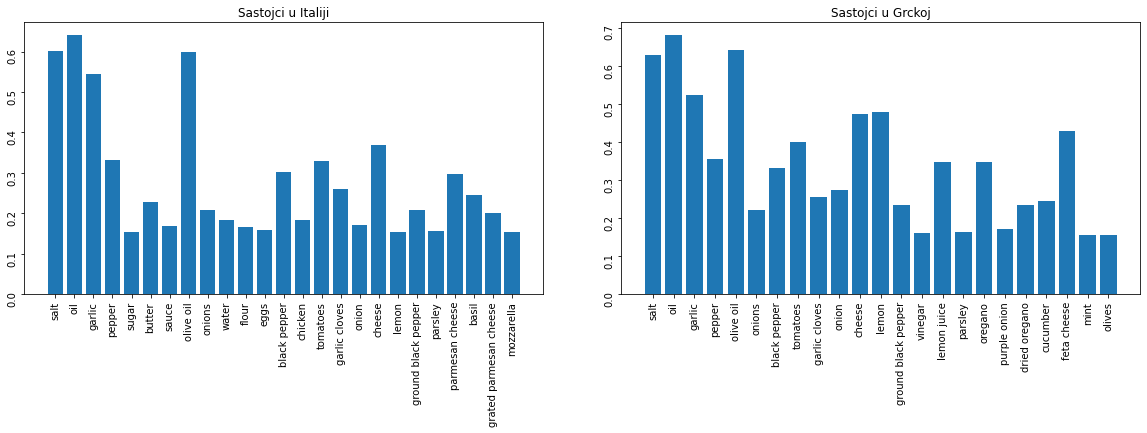

In [37]:
fig, ax = plt.subplots(1, 2, figsize=[20,5])
fig.subplots_adjust(hspace=0.2, wspace=0.15)

values = italian.sum(axis=0)/italian.shape[0]
toDrop=[]
k = 0
for i in values:
    if i < 0.15:
        toDrop.append(k)
    k = k + 1
italian1 = italian.drop(italian.columns[toDrop], axis=1)
values = values.drop(values.index[toDrop])

values1 = greek.sum(axis=0)/greek.shape[0]
toDrop=[]
k = 0
for i in values1:
    if i < 0.15:
        toDrop.append(k)
    k = k + 1
greek1 = greek.drop(greek.columns[toDrop], axis=1)
values1 = values1.drop(values1.index[toDrop])

ax[0].bar(italian1.columns,values)
ax[1].bar(greek1.columns,values1)
ax[0].set_title("Sastojci u Italiji")
ax[1].set_title("Sastojci u Grckoj")
ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)

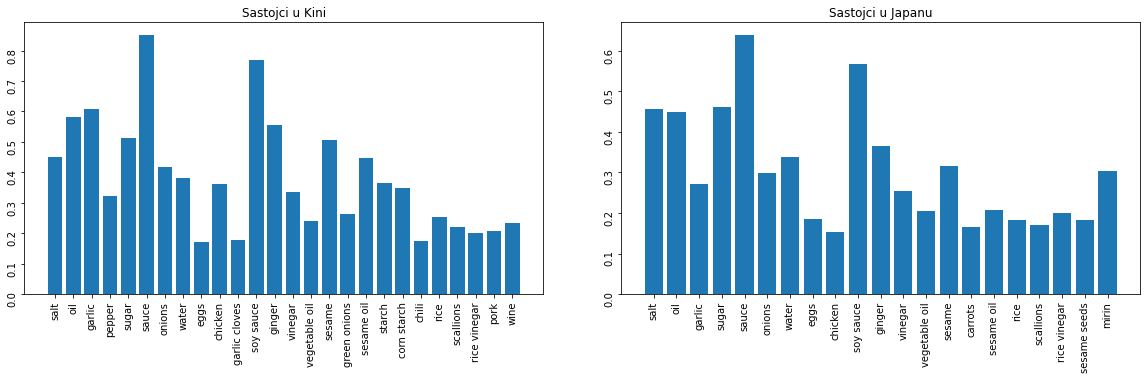

In [38]:
fig, ax = plt.subplots(1, 2, figsize=[20,5])
fig.subplots_adjust(hspace=0.2, wspace=0.15)

values = chinese.sum(axis=0)/chinese.shape[0]
toDrop=[]
k = 0
for i in values:
    if i < 0.15:
        toDrop.append(k)
    k = k + 1
chinese1 = chinese.drop(chinese.columns[toDrop], axis=1)
values = values.drop(values.index[toDrop])

values1 = japanese.sum(axis=0)/japanese.shape[0]
toDrop=[]
k = 0
for i in values1:
    if i < 0.15:
        toDrop.append(k)
    k = k + 1
japanese1 = japanese.drop(japanese.columns[toDrop], axis=1)
values1 = values1.drop(values1.index[toDrop])

ax[0].bar(chinese1.columns,values)
ax[1].bar(japanese1.columns,values1)
ax[0].set_title("Sastojci u Kini")
ax[1].set_title("Sastojci u Japanu")
ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)

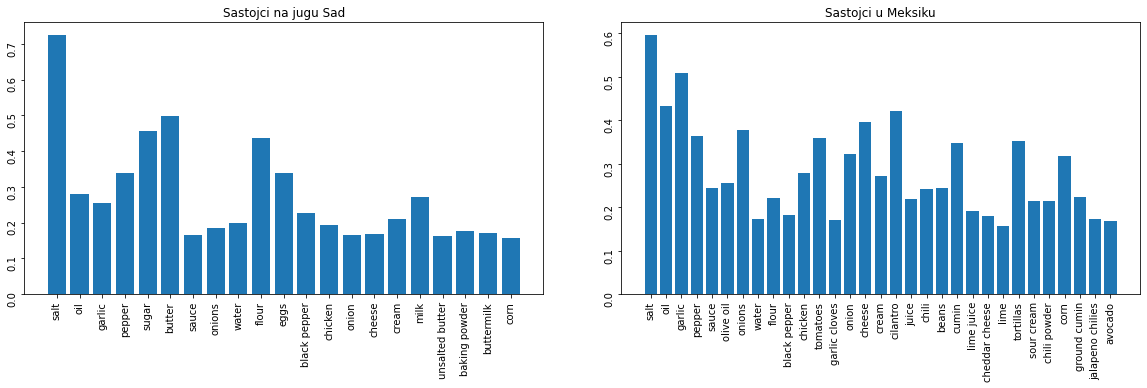

In [39]:
fig, ax = plt.subplots(1, 2, figsize=[20,5])
fig.subplots_adjust(hspace=0.2, wspace=0.15)

values = sad.sum(axis=0)/sad.shape[0]
toDrop=[]
k = 0
for i in values:
    if i < 0.15:
        toDrop.append(k)
    k = k + 1
sad1 = sad.drop(sad.columns[toDrop], axis=1)
values = values.drop(values.index[toDrop])

values1 = mexican.sum(axis=0)/mexican.shape[0]
toDrop=[]
k = 0
for i in values1:
    if i < 0.15:
        toDrop.append(k)
    k = k + 1
mexican1 = mexican.drop(mexican.columns[toDrop], axis=1)
values1 = values1.drop(values1.index[toDrop])

ax[0].bar(sad1.columns,values)
ax[1].bar(mexican1.columns,values1)
ax[0].set_title("Sastojci na jugu Sad")
ax[1].set_title("Sastojci u Meksiku")
ax[0].tick_params(labelrotation=90)
ax[1].tick_params(labelrotation=90)

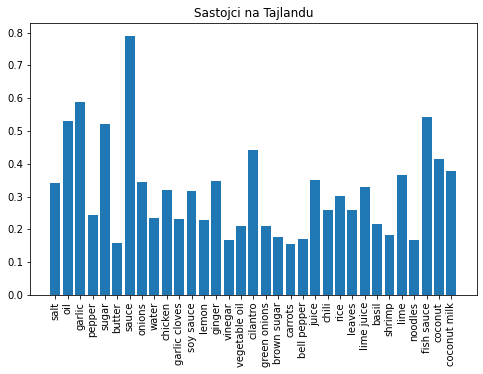

In [40]:
values = thai.sum()/thai.shape[0]
toDrop=[]
k = 0
for i in values:
    if i < 0.15:
        toDrop.append(k)
    k = k + 1
thai1 = thai.drop(thai.columns[toDrop], axis=1)
values = values.drop(values.index[toDrop])
plt.figure(figsize=(8,5)).set_edgecolor('black')
plt.bar(thai1.columns,values)
plt.title('Sastojci na Tajlandu')
plt.xticks(rotation=90)
plt.show()

In [41]:
#Provjera da li postoje sastojci koji se u velikoj kolicini pojavljuju u svim zemljama pa nisu znacajni za donosenje odluke
thai3=thai.shape[0]/3
sad3=sad.shape[0]/3
japan3=japanese.shape[0]/3
mexic3=mexican.shape[0]/3
italia3=italian.shape[0]/3
british3=british.shape[0]/3
chinese3=chinese.shape[0]/3
greek3=greek.shape[0]/3
frensh3=french.shape[0]/3


for i in X.columns:
    if sad[i].sum()>sad3 and thai[i].sum()>thai3 and japanese[i].sum()>japan3 and mexican[i].sum()>mexic3:
        print(i)

salt


-Na osnovu prethodnih grafika uočava se da su u svim receptima iz svih zemalja najkorišteniji sastojci:so,ulje,šećer,bijeli luk,voda,papar,puter,..<br>
-Također uočeni su i sastojci koji su specifični za svaku zemlju<br>
-Najčešći sastojci u Francuskoj su slični kao u Britaniji i većinom su to već ovi ovdje pobroani gdje ni jedan nije specifičan samo za nju<br>
-Za Britaniju se izdvaja češća upotreba mlijeka, kao i govedine koja nije prikazana za ostale zemlje<br>
-U Italiji je zastupljena upotreba paradajiza i maslinovog ulja, a kao specifičan sastojak izdvaja se bosiljak<br>
-Za Grčku su sastojci u velikoj većini slični kao i u Italiji, a specifični su masline i origano<br>
-Ono što Kineske i Japanske recepte razdvaja od drugih je upotreba sojinog sosa,susamovog ulja i riže<br>
-Za jug SAD su sastojci slični kao i u evropskim zemljama, bez nekog odtupanja od ostalih<br>
-Meksiko koristi čili, pasulj,kim i dosta drugih specifičnih sastojaka<br>
-Sa Tajvanu se ne mogu izvodjiti posbeni sastojci
                                                                                       

# <h1>Proces klasifikacije</h1>

In [84]:
#podjela skupa na trening i test skup
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10, stratify=y)

In [61]:
X_train.describe()

,salt,oil,garlic,pepper,sugar,butter,sauce,olive oil,onions,water,...,broth,zucchini,mirin,tomato paste,chicken breasts,peanut oil,yellow onion,fillets,lettuce,mayonaise
count,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000,...,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000,9509.000000
mean,0.593333,0.455884,0.415186,0.299085,0.337890,0.280576,0.301399,0.254496,0.262068,0.229467,...,0.036387,0.023977,0.023557,0.024713,0.024082,0.024713,0.023451,0.029235,0.028499,0.023346
std,0.491238,0.498076,0.492780,0.457881,0.473016,0.449304,0.458890,0.435600,0.439782,0.420512,...,0.187260,0.152986,0.151671,0.155259,0.153313,0.155259,0.151340,0.168475,0.166403,0.151009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


-Skup je podijeljen tako da je 10% podataka upotrebljeno za test skup

In [43]:
#Prikaz broja uzoraka iz testnog skupa po zemljama 
y_test.groupby(by=y_test).count()


country
british         51
chinese        129
french         157
greek           59
italian        167
japanese        76
mexican        127
southern_us    230
thai            61
Name: country, dtype: int64

In [44]:
#Prikaz broj uzoraka na trening skupu
y_train.groupby(by=y_train).count()

country
british         458
chinese        1162
french         1408
greek           528
italian        1503
japanese        679
mexican        1147
southern_us    2073
thai            551
Name: country, dtype: int64

<h3>KNN klasifikator</h3>

In [45]:
#definisanje mjera za svaku klasu gdje i predstavlja broj vrste tj kolone odredjene klase 
def evaluation_classif(conf_mat,i):
    sum=0
    TP = conf_mat[i,i]
    
    if i==0:
        FN=conf_mat[i,1:].sum()
        FP=conf_mat[1:,i].sum()
        TN=conf_mat[1:,1:].sum()
    elif i==8:
        FN=conf_mat[i,:-1].sum()
        FP=conf_mat[:-1,i].sum()
        TN=conf_mat[:-1,:-1].sum()
    else:
        FN=conf_mat[i,0:i].sum()+conf_mat[i,i+1:].sum()
        FP=conf_mat[0:i,i].sum()+conf_mat[i+1:,i].sum()
        for k in range(0,9):
            for n in range (0,9):
                if k!=i and n!=i:
                    sum=sum+conf_mat[k,n]
        TN=sum
 
    precision = TP/(TP+FP)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    F_score = 2*precision*sensitivity/(precision+sensitivity)
    print('Preciznost: ', precision)
    print('Tacnost: ', accuracy)
    print('Osjetljivost: ', sensitivity)
    print('Specificnost: ', specificity)
    print('F score: ', F_score)

<h4>Unakrsna validacija</h4>

-Unakrsna validacija je izvršena na trening skupu, sa podjelom na 5 k cjelina<br>
-Iskorištena je<u> StratifiedKFold </u>funkcija koja za razliku od obične vodi računa da su uzorci jednako raspoređeni po kategorijama za svaki od modela<br>

-Da bi se izabrali optimalni parametri unkarsna vlaidacija je odrađena na modelima sa sa <u>1,3,5,10,15,17,19</u> susjeda i metrikama:<u> Jaccard,Dice i Matching</u><br>

-Kao mjera uspješnosti za odabir parametara posmatrana je <u>tačnost</u> koja se računa na osnovu konačne matrice kofuzije<br>
-Konačna matrica konfuzije se dobija sabiranjem vrijenosti matrica za svaki model koji je izvršen nad 4 k cjeline

In [46]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[1,3,5,10,15,17,19], 'metric':('jaccard', 'dice','matching')}

    
# defining parameter range
grid = GridSearchCV(knn,parameters,cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='recall_micro')
  
# fitting the model for grid search
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-p

0.6893489009879686
{'metric': 'jaccard', 'n_neighbors': 17}


C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


0 )Parametri k= 1 i m= jaccard
Tacnost je:  0.6309810930214935
Osjetljivost je: 0.6309810930214935
Matrica konfuzije:


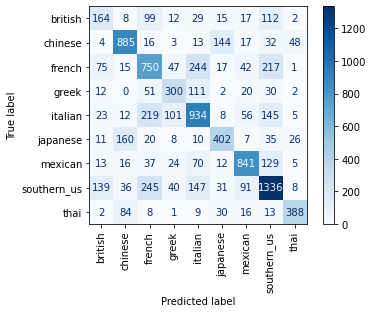

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


1 )Parametri k= 1 i m= dice
Tacnost je:  0.6309810930214935
Osjetljivost je: 0.6309810930214935
Matrica konfuzije:


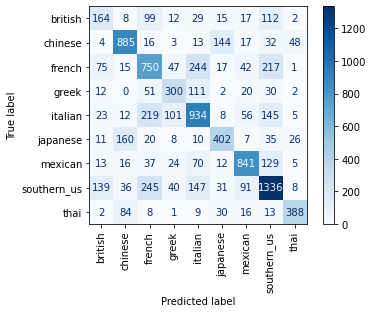

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


2 )Parametri k= 1 i m= matching
Tacnost je:  0.5941729157989236
Osjetljivost je: 0.5941729157989236
Matrica konfuzije:


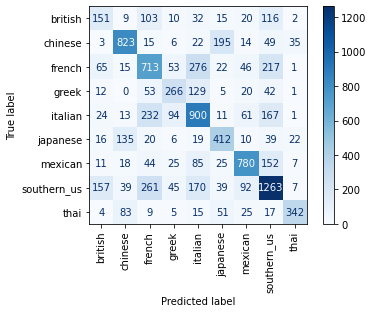

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


3 )Parametri k= 3 i m= jaccard
Tacnost je:  0.6492806099617723
Osjetljivost je: 0.6492806099617723
Matrica konfuzije:


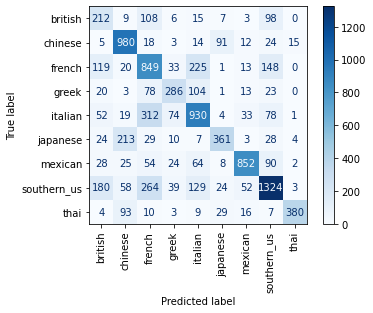

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


4 )Parametri k= 3 i m= dice
Tacnost je:  0.6492806099617723
Osjetljivost je: 0.6492806099617723
Matrica konfuzije:


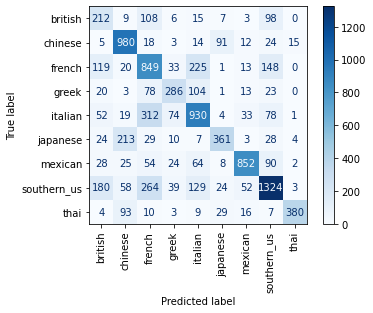

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


5 )Parametri k= 3 i m= matching
Tacnost je:  0.6092127061356274
Osjetljivost je: 0.6092127061356274
Matrica konfuzije:


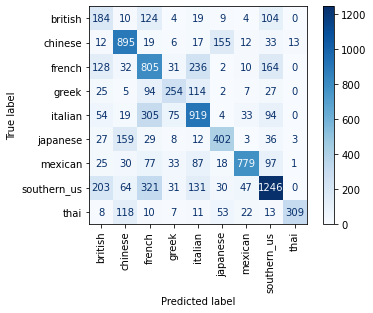

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


6 )Parametri k= 5 i m= jaccard
Tacnost je:  0.6697872225089346
Osjetljivost je: 0.6697872225089346
Matrica konfuzije:


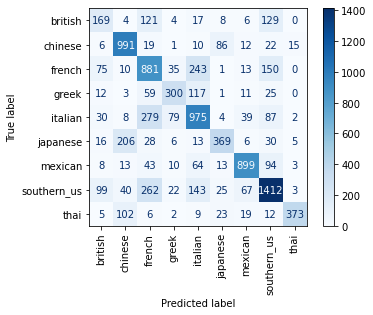

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


7 )Parametri k= 5 i m= dice
Tacnost je:  0.6697872225089346
Osjetljivost je: 0.6697872225089346
Matrica konfuzije:


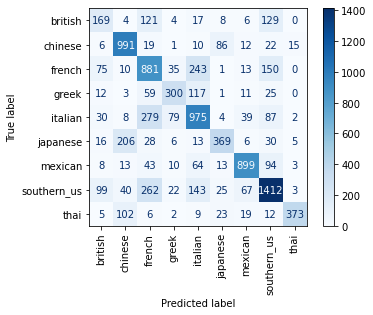

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


8 )Parametri k= 5 i m= matching
Tacnost je:  0.6352935612503464
Osjetljivost je: 0.6352935612503464
Matrica konfuzije:


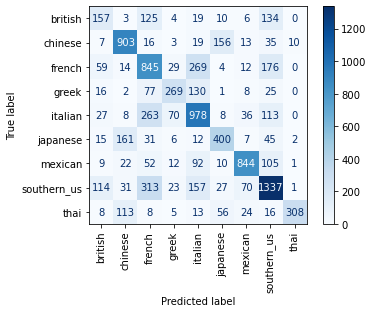

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


9 )Parametri k= 10 i m= jaccard
Tacnost je:  0.6874554927369567
Osjetljivost je: 0.6874554927369567
Matrica konfuzije:


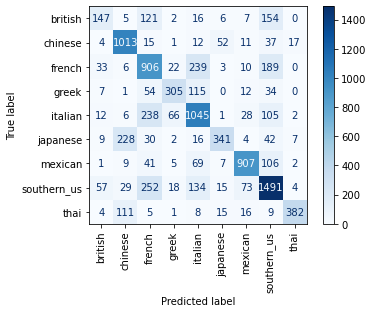

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


10 )Parametri k= 10 i m= dice
Tacnost je:  0.6874554927369567
Osjetljivost je: 0.6874554927369567
Matrica konfuzije:


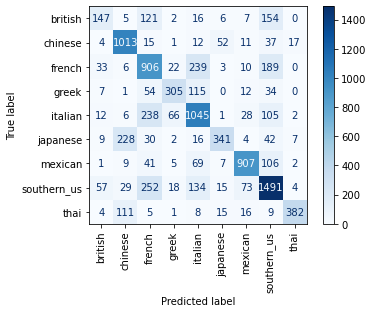

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


11 )Parametri k= 10 i m= matching
Tacnost je:  0.655169037713838
Osjetljivost je: 0.655169037713838
Matrica konfuzije:


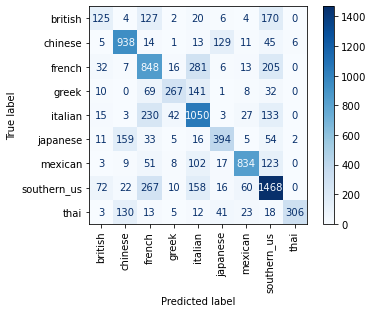

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


12 )Parametri k= 15 i m= jaccard
Tacnost je:  0.6889279039035849
Osjetljivost je: 0.6889279039035849
Matrica konfuzije:


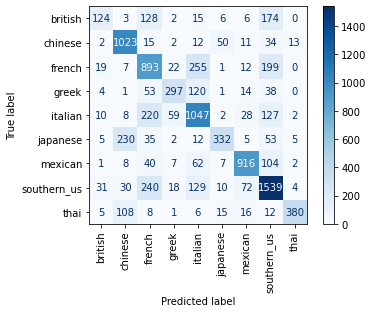

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


13 )Parametri k= 15 i m= dice
Tacnost je:  0.6889279039035849
Osjetljivost je: 0.6889279039035849
Matrica konfuzije:


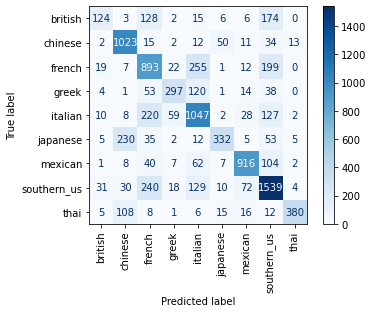

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


14 )Parametri k= 15 i m= matching
Tacnost je:  0.6553805042561582
Osjetljivost je: 0.6553805042561582
Matrica konfuzije:


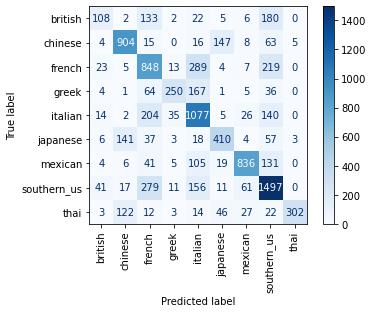

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


15 )Parametri k= 17 i m= jaccard
Tacnost je:  0.6893489009879686
Osjetljivost je: 0.6893489009879686
Matrica konfuzije:


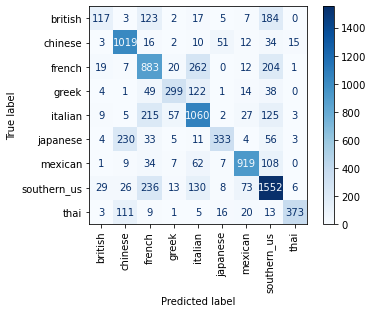

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


16 )Parametri k= 17 i m= dice
Tacnost je:  0.6893489009879686
Osjetljivost je: 0.6893489009879686
Matrica konfuzije:


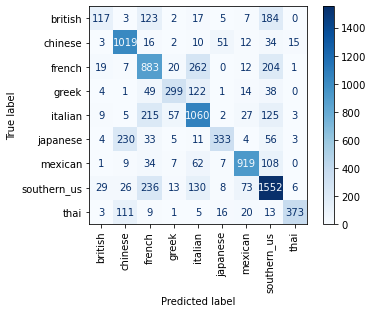

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


17 )Parametri k= 17 i m= matching
Tacnost je:  0.6567475970088242
Osjetljivost je: 0.6567475970088242
Matrica konfuzije:


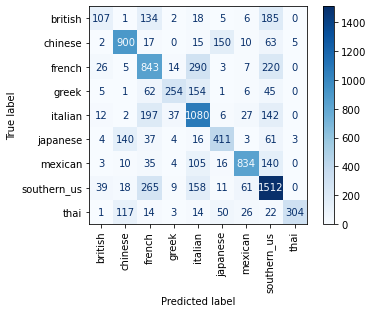

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


18 )Parametri k= 19 i m= jaccard
Tacnost je:  0.6880860203634038
Osjetljivost je: 0.6880860203634038
Matrica konfuzije:


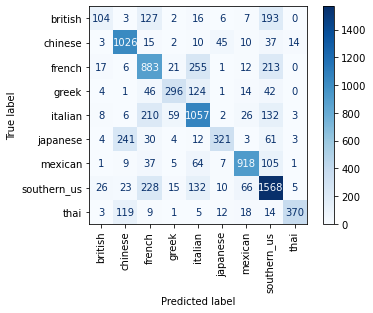

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


19 )Parametri k= 19 i m= dice
Tacnost je:  0.6880860203634038
Osjetljivost je: 0.6880860203634038
Matrica konfuzije:


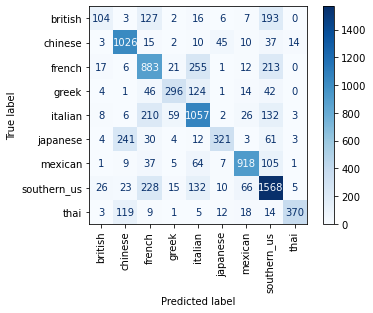

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


20 )Parametri k= 19 i m= matching
Tacnost je:  0.6535928016191599
Osjetljivost je: 0.6535928016191599
Matrica konfuzije:


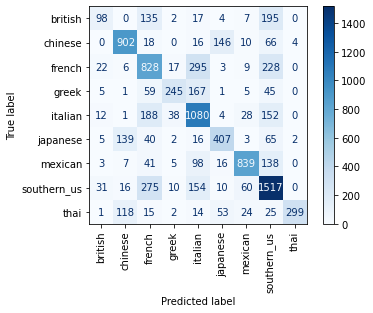

*Najbolja osjetljivost je u iteraciji broj:  15


In [54]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
rec=[]
iter=0
for k in [1,3,5,10,15,17,19]:
    for m in ['jaccard', 'dice','matching']:
        indexes = kf.split(X_train, y_train)
        acc_tmp = [] #tacnost
        rec_tmp=[]  #osjetljivost
        fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
        for train_index, test_index in indexes:
            classifier = KNeighborsClassifier(n_neighbors=k, metric=m)
            classifier.fit(X_train.iloc[train_index,:], y_train.iloc[train_index])
            y_pred = classifier.predict(X_train.iloc[test_index,:])
            acc_tmp.append(accuracy_score(y_train.iloc[test_index], y_pred))
            rec_tmp.append( recall_score(y_train.iloc[test_index], y_pred,average='micro'))
           
            fin_conf_mat += confusion_matrix(y_train.iloc[test_index], y_pred, labels=classifier.classes_)
        iter=iter+1
        print(iter-1,')Parametri k=',k, 'i m=',m)
        print('Tacnost je: ', np.mean(acc_tmp))
        print('Osjetljivost je:',np.mean(rec_tmp))
        print('Matrica konfuzije:')
        

        disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
        disp.plot(cmap="Blues", values_format='.5g', xticks_rotation=90)  
        plt.show()
        
        acc.append(np.mean(acc_tmp))
        rec.append(np.mean(rec_tmp))
print('*Najbolja osjetljivost je u iteraciji broj: ', np.argmax(rec))

-Na osnovu unakrsna validacije rezultati pokazuju da je osjetljivost najveća za model sa parametrima:k=17 i m=jaccard<br>
-Njegova mikro osjetljivost je: 0.6893489009879686

<h4>Unakrsna validacija sa optimlanim parametrima</h4>

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Tacnost je:  0.6893489009879686
Osjetljivost je: 0.6893489009879686
Matrica konfuzije:


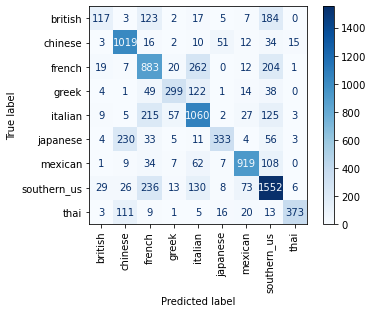

In [87]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
indexes = kf.split(X_train, y_train)
acc_tmp = [] #tacnost
rec_tmp=[]  #osjetljivost
fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
for train_index, test_index in indexes:
    classifier = KNeighborsClassifier(n_neighbors=17, metric='jaccard')
    classifier.fit(X_train.iloc[train_index,:], y_train.iloc[train_index])
    y_pred = classifier.predict(X_train.iloc[test_index,:])
    acc_tmp.append(accuracy_score(y_train.iloc[test_index], y_pred))
    rec_tmp.append( recall_score(y_train.iloc[test_index], y_pred,average='micro'))
    fin_conf_mat += confusion_matrix(y_train.iloc[test_index], y_pred, labels=classifier.classes_)
    
print('Tacnost je: ', np.mean(acc_tmp))
print('Osjetljivost je:',np.mean(rec_tmp))
print('Matrica konfuzije:')
        

disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
disp.plot(cmap="Blues", values_format='.5g', xticks_rotation=90)  
plt.show()
        
acc.append(np.mean(acc_tmp))



In [155]:
#Mjere za svaku od klasa odabrane matrice konfuzije nakon validacije
print('**Prikaz mjera za svaku od kategorija:')
print('*Britanija:')
evaluation_classif(fin_conf_mat,0)
print('\n *Kina:')
evaluation_classif(fin_conf_mat,1)

print('\n *Francuska:')
evaluation_classif(fin_conf_mat,2)
print('\n *Grčka:')
evaluation_classif(fin_conf_mat,3)
print('\n *Italija:')
evaluation_classif(fin_conf_mat,4)
print('\n *Japan:')
evaluation_classif(fin_conf_mat,5)
print('\n *Meksiko:')
evaluation_classif(fin_conf_mat,6)
print('\n *Jug SAD:')
evaluation_classif(fin_conf_mat,7)
print('\n *Tajland:')
evaluation_classif(fin_conf_mat,8)

**Prikaz mjera za svaku od kategorija:
*Britanija:
Preciznost:  0.6190476190476191
Tacnost:  0.9565674624040382
Osjetljivost:  0.2554585152838428
Specificnost:  0.9920450778919456
F score:  0.3616692426584235

 *Kina:
Preciznost:  0.7221828490432317
Tacnost:  0.943737511830897
Osjetljivost:  0.8769363166953529
Specificnost:  0.953037019288367
F score:  0.792071511853867

 *Francuska:
Preciznost:  0.5525657071339174
Tacnost:  0.8695972236828268
Osjetljivost:  0.6271306818181818
Specificnost:  0.9117392914455006
F score:  0.5874916833000664

 *Grčka:
Preciznost:  0.7364532019704434
Tacnost:  0.9646650541592175
Osjetljivost:  0.5662878787878788
Specificnost:  0.9880859592472998
F score:  0.6402569593147752

 *Italija:
Preciznost:  0.631328171530673
Tacnost:  0.8883163318960985
Osjetljivost:  0.7052561543579507
Specificnost:  0.9226829877591806
F score:  0.6662476429918289

 *Japan:
Preciznost:  0.7872340425531915
Tacnost:  0.9541487012304133
Osjetljivost:  0.49042709867452133
Specificnost

-Iz prikazanih mjera se može uočiti da Kina ima najveće vrijednosti gdje su blizu i Tajland i Meksiko zbo svojih sastojaka. Najlošije su klasifikovani recepti koji pripadaju Britaniji

<h4>Obuka finalnog modela</h4>

C:\Users\nata1\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


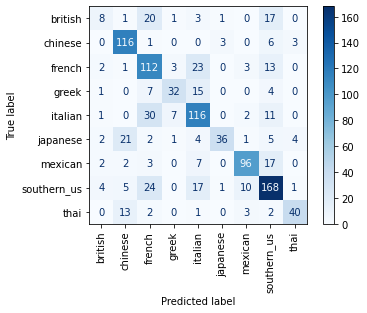

Tačnost:  0.684957426679281
Preciznost mikro:  0.684957426679281
Preciznost makro:  0.6972472296928113
Osjetljivost mikro:  0.684957426679281
Osjetljivost makro:  0.6246899130156719
f mera mikro:  0.684957426679281
f mera makro:  0.6431407132097635


In [88]:
#Obuka finalnog modela nad svim podacima i testiranje nad prethodno izdvojenim testnim skupom
knn = KNeighborsClassifier(n_neighbors=17, metric='jaccard')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

conf_mat = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
#print(conf_mat)

disp = ConfusionMatrixDisplay(confusion_matrix =conf_mat,  display_labels=classifier.classes_)
disp.plot(cmap="Blues", values_format='.5g', xticks_rotation=90)  
plt.show()

print('Tačnost: ', accuracy_score(y_test, y_pred))
print('Preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('Preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('Osjetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('Osjetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))






--Nakon obučavanja modela nad testnim skupom dobivena je osjetljivost koja je za manje od 1% lošija od one dobijene unakrsnom validacijom<br>
-na osnovu matrice konfuzije uočava se da je najveći broj pogođenih pozitivno oadbrenih 168

In [89]:
#Mjere za svaku od klasa
print('**Prikaz mjera nad konačnim modelom za svaku od kategorija:')
print('*Britanija:')
evaluation_classif(conf_mat,0)
print('\n *Kina:')
evaluation_classif(conf_mat,1)

print('\n *Francuska:')
evaluation_classif(conf_mat,2)
print('\n *Grčka:')
evaluation_classif(conf_mat,3)
print('\n *Italija:')
evaluation_classif(conf_mat,4)
print('\n *Japan:')
evaluation_classif(conf_mat,5)
print('\n *Meksiko:')
evaluation_classif(conf_mat,6)
print('\n *Jug SAD:')
evaluation_classif(conf_mat,7)
print('\n *Tajland:')
evaluation_classif(conf_mat,8)

**Prikaz mjera nad konačnim modelom za svaku od kategorija:
*Britanija:
Preciznost:  0.4
Tacnost:  0.9479659413434248
Osjetljivost:  0.1568627450980392
Specificnost:  0.9880715705765407
F score:  0.22535211267605632

 *Kina:
Preciznost:  0.7295597484276729
Tacnost:  0.9470198675496688
Osjetljivost:  0.8992248062015504
Specificnost:  0.9536637931034483
F score:  0.8055555555555556

 *Francuska:
Preciznost:  0.5572139303482587
Tacnost:  0.8732261116367077
Osjetljivost:  0.7133757961783439
Specificnost:  0.9011111111111111
F score:  0.6256983240223464

 *Grčka:
Preciznost:  0.7272727272727273
Tacnost:  0.9631031220435194
Osjetljivost:  0.5423728813559322
Specificnost:  0.9879759519038076
F score:  0.6213592233009708

 *Italija:
Preciznost:  0.6236559139784946
Tacnost:  0.8855250709555346
Osjetljivost:  0.6946107784431138
Specificnost:  0.9213483146067416
F score:  0.6572237960339944

 *Japan:
Preciznost:  0.8780487804878049
Tacnost:  0.9574266792809839
Osjetljivost:  0.47368421052631576
S

<h3>*SVM klasifikator*</h3>

<h4>Izbor optimalnih parametara</h4>

In [10]:
parameters = {'C':[1, 5, 10, 50, 100], 'kernel': ('rbf', 'poly', 'linear'),'class_weight':(None, 'balanced')}
svc = SVC()

clf=GridSearchCV(svc, parameters,  cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.7377243478583135
{'C': 5, 'class_weight': None, 'kernel': 'rbf'}


<h4>Izbor optimalnih parametara na osnovu unakrsne validacije</h4>

0 )Parametri C= 1  kernel= linear  i pristup ovr
Tacnost je:  0.7127996720968708
Osjetljivost je: 0.7127996720968708
Matrica konfuzije:


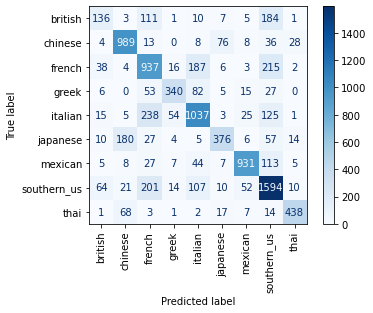

1 )Parametri C= 1  kernel= linear  i pristup ovo
Tacnost je:  0.7127996720968708
Osjetljivost je: 0.7127996720968708
Matrica konfuzije:


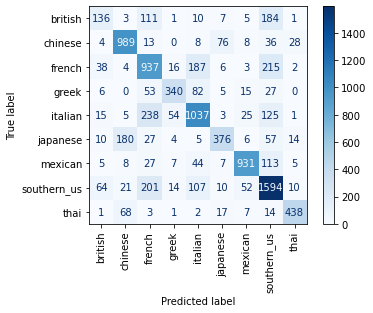

2 )Parametri C= 1  kernel= rbf  i pristup ovr
Tacnost je:  0.7341481128699211
Osjetljivost je: 0.7341481128699211
Matrica konfuzije:


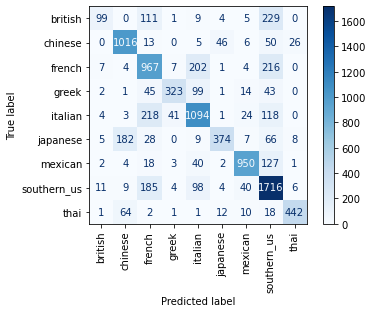

3 )Parametri C= 1  kernel= rbf  i pristup ovo
Tacnost je:  0.7341481128699211
Osjetljivost je: 0.7341481128699211
Matrica konfuzije:


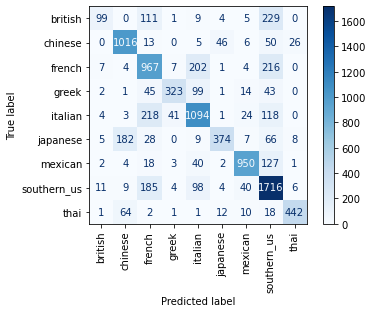

4 )Parametri C= 1  kernel= poly  i pristup ovr
Tacnost je:  0.6886125571189219
Osjetljivost je: 0.6886125571189219
Matrica konfuzije:


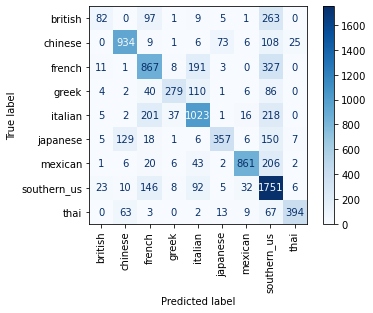

5 )Parametri C= 1  kernel= poly  i pristup ovo
Tacnost je:  0.6886125571189219
Osjetljivost je: 0.6886125571189219
Matrica konfuzije:


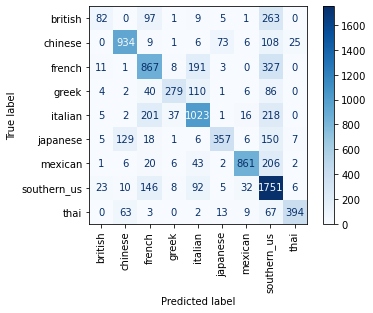

6 )Parametri C= 5  kernel= linear  i pristup ovr
Tacnost je:  0.7065944593885226
Osjetljivost je: 0.7065944593885226
Matrica konfuzije:


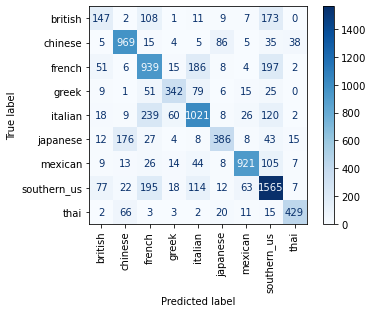

7 )Parametri C= 5  kernel= linear  i pristup ovo
Tacnost je:  0.7065944593885226
Osjetljivost je: 0.7065944593885226
Matrica konfuzije:


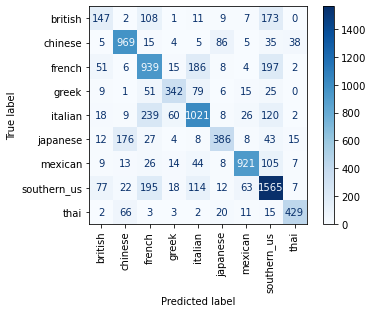

8 )Parametri C= 5  kernel= rbf  i pristup ovr
Tacnost je:  0.7377243478583135
Osjetljivost je: 0.7377243478583135
Matrica konfuzije:


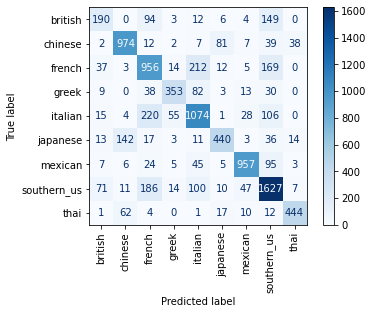

9 )Parametri C= 5  kernel= rbf  i pristup ovo
Tacnost je:  0.7377243478583135
Osjetljivost je: 0.7377243478583135
Matrica konfuzije:


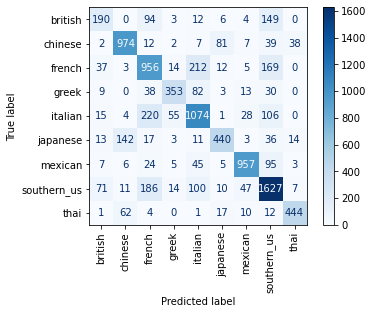

10 )Parametri C= 5  kernel= poly  i pristup ovr
Tacnost je:  0.7083836555114333
Osjetljivost je: 0.7083836555114333
Matrica konfuzije:


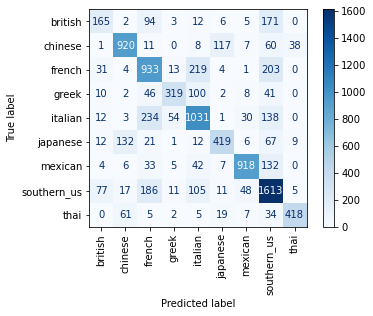

11 )Parametri C= 5  kernel= poly  i pristup ovo
Tacnost je:  0.7083836555114333
Osjetljivost je: 0.7083836555114333
Matrica konfuzije:


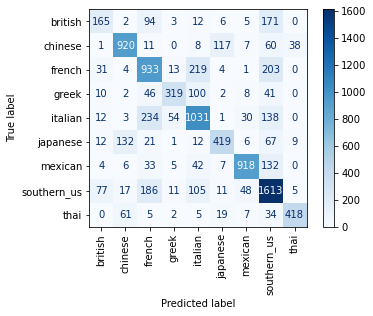

12 )Parametri C= 10  kernel= linear  i pristup ovr
Tacnost je:  0.7033345115277754
Osjetljivost je: 0.7033345115277754
Matrica konfuzije:


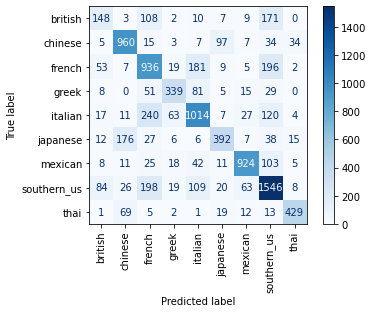

13 )Parametri C= 10  kernel= linear  i pristup ovo
Tacnost je:  0.7033345115277754
Osjetljivost je: 0.7033345115277754
Matrica konfuzije:


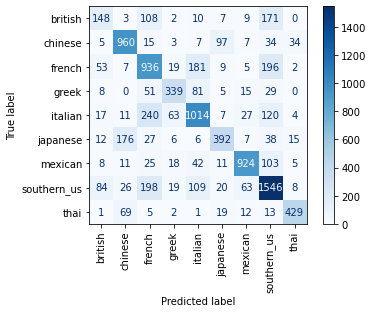

14 )Parametri C= 10  kernel= rbf  i pristup ovr
Tacnost je:  0.7277332589909233
Osjetljivost je: 0.7277332589909233
Matrica konfuzije:


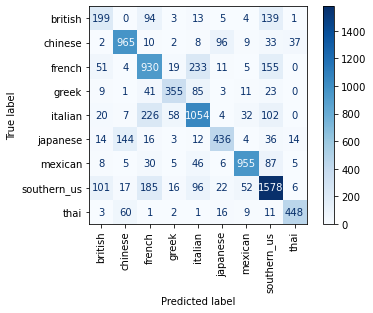

15 )Parametri C= 10  kernel= rbf  i pristup ovo
Tacnost je:  0.7277332589909233
Osjetljivost je: 0.7277332589909233
Matrica konfuzije:


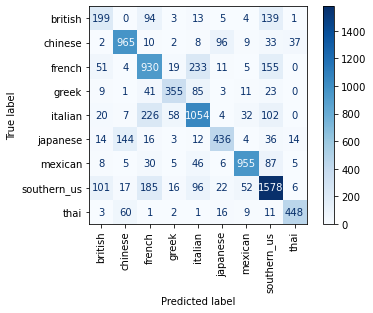

16 )Parametri C= 10  kernel= poly  i pristup ovr
Tacnost je:  0.7069108018304606
Osjetljivost je: 0.7069108018304606
Matrica konfuzije:


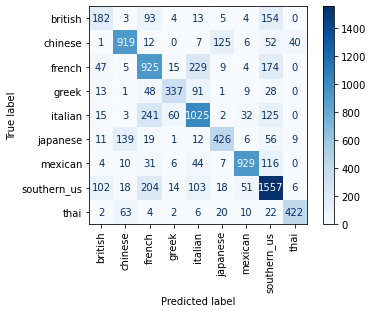

17 )Parametri C= 10  kernel= poly  i pristup ovo
Tacnost je:  0.7069108018304606
Osjetljivost je: 0.7069108018304606
Matrica konfuzije:


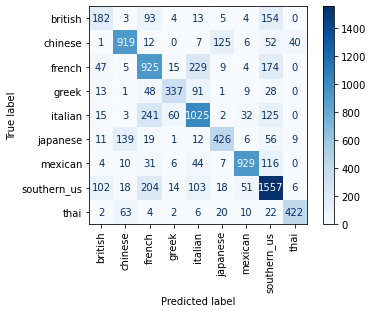

18 )Parametri C= 50  kernel= linear  i pristup ovr
Tacnost je:  0.6991275276557636
Osjetljivost je: 0.6991275276557636
Matrica konfuzije:


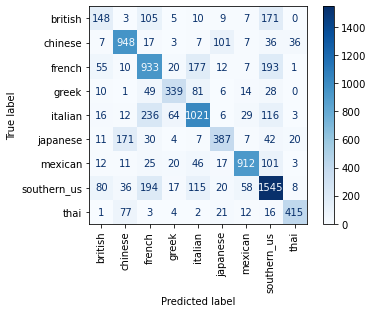

19 )Parametri C= 50  kernel= linear  i pristup ovo
Tacnost je:  0.6991275276557636
Osjetljivost je: 0.6991275276557636
Matrica konfuzije:


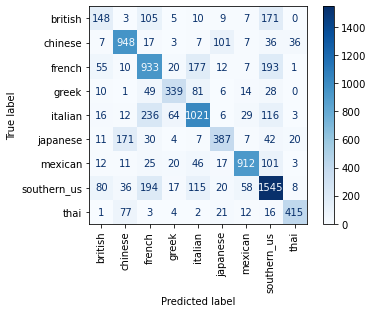

20 )Parametri C= 50  kernel= rbf  i pristup ovr
Tacnost je:  0.7149034406043419
Osjetljivost je: 0.7149034406043419
Matrica konfuzije:


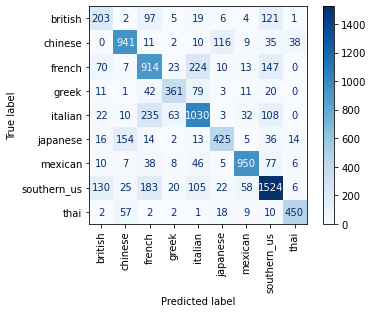

21 )Parametri C= 50  kernel= rbf  i pristup ovo
Tacnost je:  0.7149034406043419
Osjetljivost je: 0.7149034406043419
Matrica konfuzije:


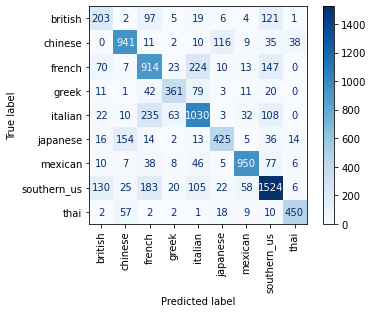

22 )Parametri C= 50  kernel= poly  i pristup ovr
Tacnost je:  0.6935547785741193
Osjetljivost je: 0.6935547785741193
Matrica konfuzije:


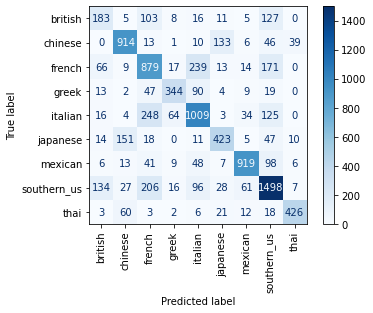

23 )Parametri C= 50  kernel= poly  i pristup ovo
Tacnost je:  0.6935547785741193
Osjetljivost je: 0.6935547785741193
Matrica konfuzije:


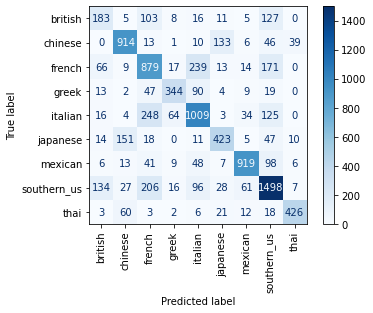

24 )Parametri C= 100  kernel= linear  i pristup ovr
Tacnost je:  0.6972346725476823
Osjetljivost je: 0.6972346725476823
Matrica konfuzije:


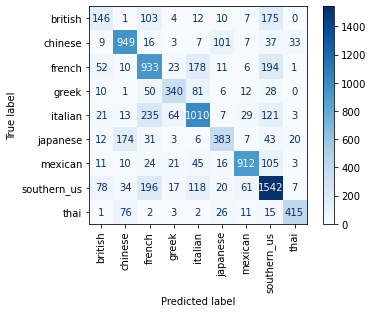

25 )Parametri C= 100  kernel= linear  i pristup ovo
Tacnost je:  0.6972346725476823
Osjetljivost je: 0.6972346725476823
Matrica konfuzije:


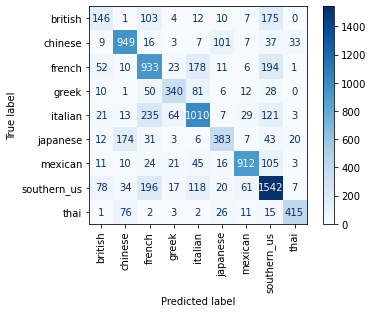

26 )Parametri C= 100  kernel= rbf  i pristup ovr
Tacnost je:  0.713851584007753
Osjetljivost je: 0.713851584007753
Matrica konfuzije:


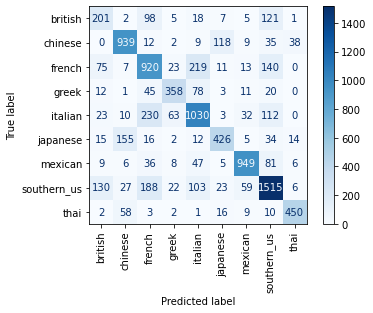

27 )Parametri C= 100  kernel= rbf  i pristup ovo
Tacnost je:  0.713851584007753
Osjetljivost je: 0.713851584007753
Matrica konfuzije:


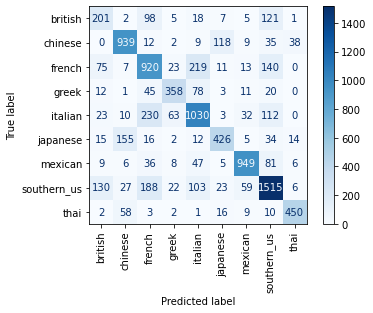

28 )Parametri C= 100  kernel= poly  i pristup ovr
Tacnost je:  0.6897689577293704
Osjetljivost je: 0.6897689577293704
Matrica konfuzije:


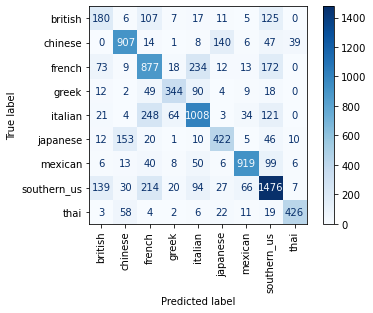

29 )Parametri C= 100  kernel= poly  i pristup ovo
Tacnost je:  0.6897689577293704
Osjetljivost je: 0.6897689577293704
Matrica konfuzije:


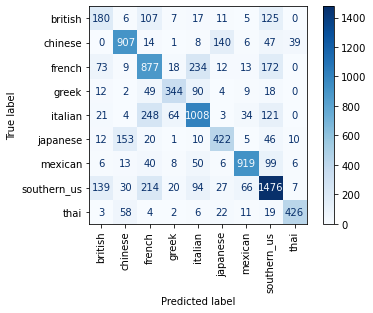

najbolja osjetljivost je u iteraciji broj:  8


In [90]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
rec=[]
iter=0
for c in [1,5, 10,50, 100]:
    for F in ['linear', 'rbf','poly']:
        for mc in ['ovr','ovo']:
            indexes = kf.split(X_train, y_train)
            acc_tmp = []
            rec_tmp=[]
            fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
            for train_index, test_index in indexes:
                classifier = SVC(C=c, kernel=F, decision_function_shape=mc)
                classifier.fit(X_train.iloc[train_index,:], y_train.iloc[train_index])
                y_pred = classifier.predict(X_train.iloc[test_index,:])
                acc_tmp.append(accuracy_score(y_train.iloc[test_index], y_pred))
                rec_tmp.append(recall_score(y_train.iloc[test_index], y_pred,average='micro'))
                fin_conf_mat += confusion_matrix(y_train.iloc[test_index], y_pred, labels=classifier.classes_)
            iter=iter+1
            print(iter-1,')Parametri C=',c, ' kernel=',F,' i pristup',mc);
            print('Tacnost je: ', np.mean(acc_tmp))
            print('Osjetljivost je:',np.mean(rec_tmp))
            print('Matrica konfuzije:')

            disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
            disp.plot(cmap="Blues", values_format='.5g', xticks_rotation=90)  
            plt.show()

            acc.append(np.mean(acc_tmp))
            rec.append(np.mean(rec_tmp))
print('najbolja osjetljivost je u iteraciji broj: ', np.argmax(rec))

0 )Parametri C=5  kernel=rbf  , pristup ovr class_weight= None , gamma= scale
Tacnost je:  0.7377243478583135
Osjetljivost je: 0.7377243478583135
Matrica konfuzije:


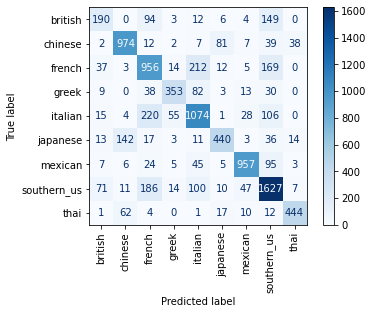

1 )Parametri C=5  kernel=rbf  , pristup ovr class_weight= None , gamma= auto
Tacnost je:  0.7119585629567924
Osjetljivost je: 0.7119585629567924
Matrica konfuzije:


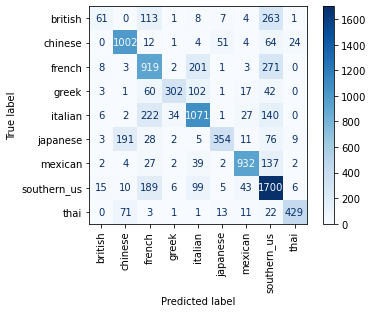

2 )Parametri C=5  kernel=rbf  , pristup ovr class_weight= balanced , gamma= scale
Tacnost je:  0.7290999092292451
Osjetljivost je: 0.7290999092292451
Matrica konfuzije:


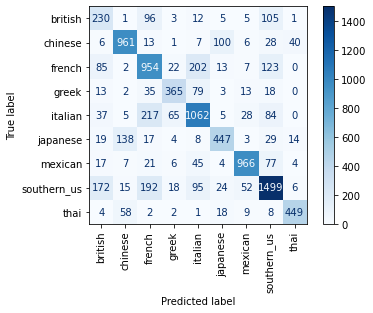

3 )Parametri C=5  kernel=rbf  , pristup ovr class_weight= balanced , gamma= auto
Tacnost je:  0.6852468483298679
Osjetljivost je: 0.6852468483298679
Matrica konfuzije:


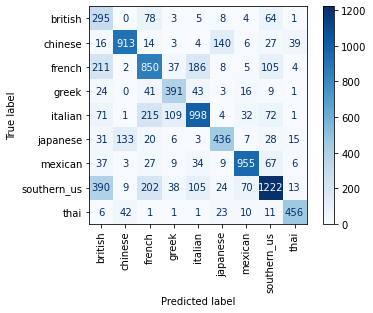

najbolja sojetljivost je u iteraciji broj:  0


In [59]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc = []
rec=[]
iter=0
for w in [None,'balanced']:
    for g in ['scale','auto']:
        indexes = kf.split(X_train, y_train)
        acc_tmp = []
        rec_tmp=[]
        fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
        for train_index, test_index in indexes:
            classifier = SVC(C=5, kernel='rbf', decision_function_shape='ovr',class_weight=w,gamma= g)
            classifier.fit(X_train.iloc[train_index,:], y_train.iloc[train_index])
            y_pred = classifier.predict(X_train.iloc[test_index,:])
            acc_tmp.append(accuracy_score(y_train.iloc[test_index], y_pred))
            rec_tmp.append(recall_score(y_train.iloc[test_index], y_pred,average='micro'))
            fin_conf_mat += confusion_matrix(y_train.iloc[test_index], y_pred, labels=classifier.classes_)
        iter=iter+1
        print(iter-1,')Parametri C=5', ' kernel=rbf',' , pristup ovr','class_weight=',w,', gamma=',g);
        print('Tacnost je: ', np.mean(acc_tmp))
        print('Osjetljivost je:',np.mean(rec_tmp))
        print('Matrica konfuzije:')

        disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
        disp.plot(cmap="Blues", values_format='.5g', xticks_rotation=90)  
        plt.show()

        acc.append(np.mean(acc_tmp))
        rec.append(np.mean(rec_tmp))
print('najbolja sojetljivost je u iteraciji broj: ', np.argmax(rec))

<h4>Unakrsna validacija za izabrane optimalne parametre</h4>

Tacnost je:  0.7377243478583135
Osjetljivost je: 0.7377243478583135
Matrica konfuzije:


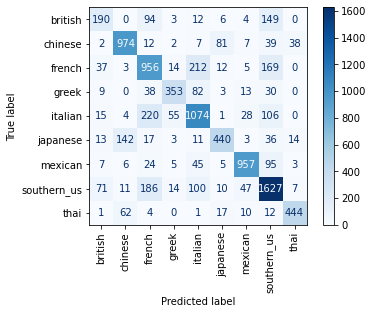

In [60]:
acc = []
indexes = kf.split(X_train, y_train)
acc_tmp = [] #tacnost
rec_tmp=[]  #osjetljivost
fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
for train_index, test_index in indexes:
    classifier = SVC(C=5, kernel='rbf', decision_function_shape='ovr',class_weight=None,gamma= 'scale')
    classifier.fit(X_train.iloc[train_index,:], y_train.iloc[train_index])
    y_pred = classifier.predict(X_train.iloc[test_index,:])
    acc_tmp.append(accuracy_score(y_train.iloc[test_index], y_pred))
    rec_tmp.append(recall_score(y_train.iloc[test_index], y_pred,average='micro'))
    fin_conf_mat += confusion_matrix(y_train.iloc[test_index], y_pred, labels=classifier.classes_)
    
print('Tacnost je: ', np.mean(acc_tmp))
print('Osjetljivost je:',np.mean(rec_tmp))
print('Matrica konfuzije:')
        

disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
disp.plot(cmap="Blues", values_format='.5g', xticks_rotation=90)  
plt.show()
        
acc.append(np.mean(acc_tmp))

In [178]:
#Mjere za svaku od klasa
print('**Prikaz mjera nad konačnim modelom za svaku od kategorija:')
print('*Britanija:')
evaluation_classif(fin_conf_mat,0)
print('\n *Kina:')
evaluation_classif(fin_conf_mat,1)

print('\n *Francuska:')
evaluation_classif(fin_conf_mat,2)
print('\n *Grčka:')
evaluation_classif(fin_conf_mat,3)
print('\n *Italija:')
evaluation_classif(fin_conf_mat,4)
print('\n *Japan:')
evaluation_classif(fin_conf_mat,5)
print('\n *Meksiko:')
evaluation_classif(fin_conf_mat,6)
print('\n *Jug SAD:')
evaluation_classif(fin_conf_mat,7)
print('\n *Tajland:')
evaluation_classif(fin_conf_mat,8)

**Prikaz mjera nad konačnim modelom za svaku od kategorija:
*Britanija:
Preciznost:  0.5507246376811594
Tacnost:  0.9555158271111579
Osjetljivost:  0.4148471615720524
Specificnost:  0.9828748204618274
F score:  0.47322540473225405

 *Kina:
Preciznost:  0.8103161397670549
Tacnost:  0.9562519718161742
Osjetljivost:  0.8382099827882961
Specificnost:  0.9726847969330298
F score:  0.8240270727580372

 *Francuska:
Preciznost:  0.6163765312701482
Tacnost:  0.889893784835419
Osjetljivost:  0.6789772727272727
Specificnost:  0.9265522774966054
F score:  0.6461642446772558

 *Grčka:
Preciznost:  0.7861915367483296
Tacnost:  0.9715006835629404
Osjetljivost:  0.6685606060606061
Specificnost:  0.9893107671751475
F score:  0.7226202661207778

 *Italija:
Preciznost:  0.6955958549222798
Tacnost:  0.9054579871700494
Osjetljivost:  0.7145708582834331
Specificnost:  0.9412940294778915
F score:  0.7049556941253692

 *Japan:
Preciznost:  0.7652173913043478
Tacnost:  0.960668840046272
Osjetljivost:  0.648011

<h4>Obuka nad testnim skupom</h4>

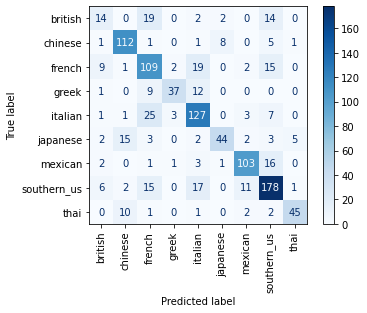

procenat pogodjenih uzoraka:  0.727530747398297
preciznost mikro:  0.727530747398297
preciznost makro:  0.7304417454380696
osetljivost mikro:  0.727530747398297
osetljivost makro:  0.6806867791191122
f mera mikro:  0.727530747398297
f mera makro:  0.6990494234550465


In [16]:
classifier =  SVC(C=5, kernel='rbf', decision_function_shape='ovr',class_weight=None,gamma= 'scale')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

#print(conf_mat)
disp = ConfusionMatrixDisplay(confusion_matrix =conf_mat,  display_labels=classifier.classes_)
disp.plot(cmap="Blues", values_format='.5g', xticks_rotation=90)  
plt.show()

print('procenat pogodjenih uzoraka: ', accuracy_score(y_test, y_pred))
print('preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))

In [19]:
#Mjere za svaku od klasa
print('**Prikaz mjera nad konačnim modelom za svaku od kategorija:')
print('*Britanija:')
evaluation_classif(conf_mat,0)
print('\n *Kina:')
evaluation_classif(conf_mat,1)

print('\n *Francuska:')
evaluation_classif(conf_mat,2)
print('\n *Grčka:')
evaluation_classif(conf_mat,3)
print('\n *Italija:')
evaluation_classif(conf_mat,4)
print('\n *Japan:')
evaluation_classif(conf_mat,5)
print('\n *Meksiko:')
evaluation_classif(conf_mat,6)
print('\n *Jug SAD:')
evaluation_classif(conf_mat,7)
print('\n *Tajland:')
evaluation_classif(conf_mat,8)

**Prikaz mjera nad konačnim modelom za svaku od kategorija:
*Britanija:
Preciznost:  0.3888888888888889
Tacnost:  0.9441816461684012
Osjetljivost:  0.27450980392156865
Specificnost:  0.9781312127236581
F score:  0.3218390804597701

 *Kina:
Preciznost:  0.7943262411347518
Tacnost:  0.956480605487228
Osjetljivost:  0.8682170542635659
Specificnost:  0.96875
F score:  0.8296296296296296

 *Francuska:
Preciznost:  0.5956284153005464
Tacnost:  0.8845789971617786
Osjetljivost:  0.6942675159235668
Specificnost:  0.9177777777777778
F score:  0.6411764705882352

 *Grčka:
Preciznost:  0.8604651162790697
Tacnost:  0.9735099337748344
Osjetljivost:  0.6271186440677966
Specificnost:  0.9939879759519038
F score:  0.7254901960784315

 *Italija:
Preciznost:  0.6902173913043478
Tacnost:  0.9082308420056765
Osjetljivost:  0.7604790419161677
Specificnost:  0.9359550561797753
F score:  0.7236467236467236

 *Japan:
Preciznost:  0.8
Tacnost:  0.9593188268684958
Osjetljivost:  0.5789473684210527
Specificnost: 